In [229]:
# Pan card fraud detection- DataFlair
import os
import cv2
import numpy as np
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout

In [230]:
img_size = 100
datadir = r'C:\\Users\\12082\\Downloads\\pan-card-fraud-detection\\Images'    # root data directiory 
CATEGORIES = os.listdir(datadir)
print(CATEGORIES)

['fake', 'real']


In [231]:
# Preprocessing Function
def PreProcess(img_size, path):
    """This function reads images from the given folders subfolder 
        and returns a normalized array along with their respective classes"""
    x, y = [], []
    CATEGORIES = os.listdir(path)
    print("Found {} classes: {}".format(len(CATEGORIES), CATEGORIES))
    
    for category in CATEGORIES:
        path = os.path.join(datadir, category)
        classIndex = CATEGORIES.index(category)
        
        for imgs in tqdm(os.listdir(path)):
            img_arr = cv2.imread(os.path.join(path, imgs))

            # resize the image
            resized_array = cv2.resize(img_arr, (img_size, img_size))
            cv2.imshow("images", resized_array)
            cv2.waitKey(1)
            # Normalize the image 
            resized_array = resized_array/255.0
            x.append(resized_array)
            y.append(classIndex)
    cv2.destroyAllWindows()
    return x, y, CATEGORIES

x, y, CATEGORIES = PreProcess(img_size, datadir)

Found 2 classes: ['fake', 'real']


100%|██████████| 825/825 [00:32<00:00, 25.17it/s]


In [232]:
# Split the dataset into training and testing
X_train, x_test, Y_train, y_test = train_test_split(x, y, random_state=42)

# Convert all the list to numpy array
X_train = np.array(X_train)
x_test = np.array(x_test)
Y_train = np.array(Y_train)
y_test = np.array(y_test)

In [233]:
# Build the model
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=(img_size, img_size, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), strides=2, activation="relu"))
model.add(Conv2D(64, (3, 3),  activation="relu"))
model.add(Conv2D(8, (3, 3), strides=2, activation="relu"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 98, 98, 16)        448       
                                                                 
 conv2d_29 (Conv2D)          (None, 48, 48, 32)        4640      
                                                                 
 conv2d_30 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 conv2d_31 (Conv2D)          (None, 22, 22, 8)         4616      
                                                                 
 dropout_7 (Dropout)         (None, 22, 22, 8)         0         
                                                                 
 flatten_7 (Flatten)         (None, 3872)              0         
                                                                 
 dense_21 (Dense)            (None, 50)               

In [234]:
history = model.fit(X_train, Y_train, batch_size = 2, epochs=15, verbose=1)


Epoch 1/15
332/332 [==============================] - 9s 22ms/step - loss: 0.3590 - accuracy: 0.9382
Epoch 2/15
332/332 [==============================] - 7s 22ms/step - loss: 0.0578 - accuracy: 0.9774
Epoch 3/15
332/332 [==============================] - 7s 22ms/step - loss: 0.0321 - accuracy: 0.9879
Epoch 4/15
332/332 [==============================] - 7s 21ms/step - loss: 0.0428 - accuracy: 0.9834
Epoch 5/15
332/332 [==============================] - 7s 22ms/step - loss: 0.0316 - accuracy: 0.9894
Epoch 6/15
332/332 [==============================] - 7s 22ms/step - loss: 0.0336 - accuracy: 0.9910
Epoch 7/15
332/332 [==============================] - 7s 21ms/step - loss: 0.0256 - accuracy: 0.9925
Epoch 8/15
332/332 [==============================] - 7s 22ms/step - loss: 0.0136 - accuracy: 0.9955
Epoch 9/15
332/332 [==============================] - 7s 21ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 10/15
332/332 [==============================] - 7s 22ms/step - loss: 0.0010 - accura

In [235]:
accuracy = history.history['accuracy']
loss = history.history['loss']

Text(0.5, 1.0, 'Loss')

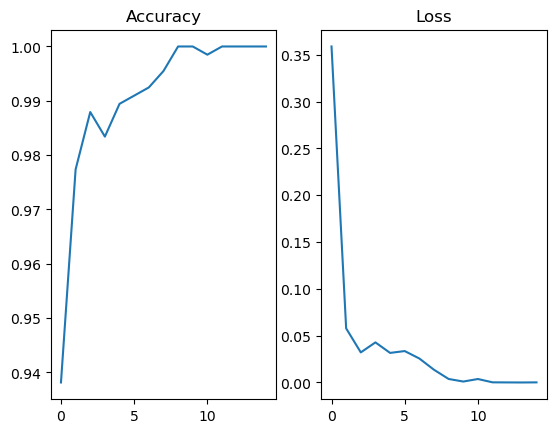

In [236]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(accuracy)
ax1.set_title("Accuracy")
ax2.plot(loss)
ax2.set_title('Loss')

In [237]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 1s 61ms/step - loss: 0.0128 - accuracy: 0.9955


[0.012771391309797764, 0.9954751133918762]

In [238]:
validation_loss, validation_accuracy = model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 34ms/step - loss: 0.0128 - accuracy: 0.9955


In [243]:
# Load images
img_real = cv2.cvtColor(cv2.imread('C:\\Users\\12082\\Downloads\\AHMFE5830H.jpg'), cv2.COLOR_BGR2RGB)
img_fake = cv2.cvtColor(cv2.imread('C:\\Users\\12082\\Downloads\\pan-card-fraud-detection\\images\\fake\\pan.jpg'), cv2.COLOR_BGR2RGB)
real = np.expand_dims(cv2.resize(img_real, (img_size, img_size)), axis=0)/255.0
fake = np.expand_dims(cv2.resize(img_fake, (img_size, img_size)), axis=0)/255.0

Text(0.5, 1.0, 'Needed to be checked')

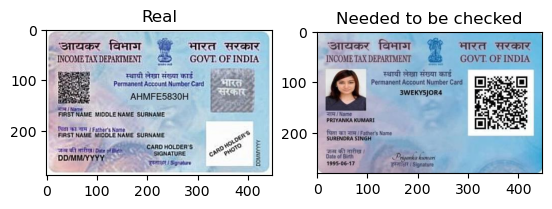

In [246]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img_real)
ax1.set_title("Real")
ax2.imshow(img_fake)
ax2.set_title('Needed to be checked')

In [247]:
# Predict from a image
pred1 = model.predict(real)
pred2 = model.predict(fake)
CATEGORIES[np.argmax(pred1)], CATEGORIES[np.argmax(pred2)]


1/1 [==============================] - 0s 22ms/step


('real', 'fake')

In [248]:
model.save("pan-card-fraud-detection-DataFlair.h5")

In [249]:
from tensorflow.keras.models import load_model

model = load_model("pan-card-fraud-detection-DataFlair.h5")


In [261]:
import cv2
import numpy as np

def preprocess_image(image_path, img_size):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size, img_size))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img

image_path = "C:\\Users\\12082\\Downloads\\AHMFE5830H.jpg"  # Replace with the path to the input image
img_size = 100  # Specify the desired size of the input image

input_image = preprocess_image(image_path, img_size)


In [262]:
predictions = model.predict(input_image)
predicted_class = np.argmax(predictions[0])
confidence = np.max(predictions[0])

1/1 [==============================] - 0s 23ms/step


In [264]:
CATEGORIES = ["Fake", "Real"]  # Specify the class labels

predicted_label = CATEGORIES[predicted_class]
print("Prediction:", predicted_label)
print("Confidence:", confidence)

Prediction: Real
Confidence: 1.0
